<a href="https://colab.research.google.com/github/ABHINAV-GOPINADH/deep_Learning/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhinavkgedit","key":"ebd09ad3e487213b8bc2e77fd8095289"}'}

In [3]:
import os
import zipfile

# Create the .kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json into the folder
!mv kaggle.json /root/.kaggle/

# Set permission
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
 98% 1.14G/1.17G [00:08<00:00, 276MB/s]
100% 1.17G/1.17G [00:08<00:00, 149MB/s]


In [5]:
import os

# List files and folders
for root, dirs, files in os.walk("chest_xray_data"):
    print(f"{root}: {len(files)} files")


In [6]:
!unzip labeled-chest-xray-images.zip -d chest_xray_data


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2558319-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/NORMAL-2655558-00

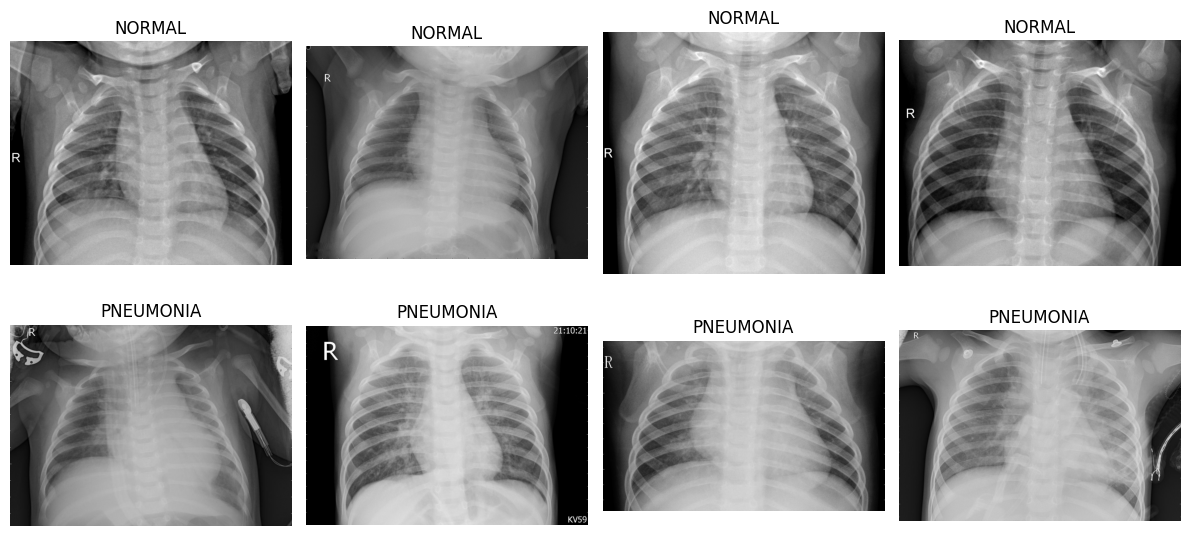

In [7]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Paths to each class
normal_path = 'chest_xray_data/chest_xray/train/NORMAL'
pneumonia_path = 'chest_xray_data/chest_xray/train/PNEUMONIA'

# Load 4 images from each class
normal_images = random.sample(os.listdir(normal_path), 4)
pneumonia_images = random.sample(os.listdir(pneumonia_path), 4)

plt.figure(figsize=(12, 6))

# Plot NORMAL images
for i, img_name in enumerate(normal_images):
    img_path = os.path.join(normal_path, img_name)
    img = Image.open(img_path)

    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title("NORMAL")
    plt.axis('off')

# Plot PNEUMONIA images
for i, img_name in enumerate(pneumonia_images):
    img_path = os.path.join(pneumonia_path, img_name)
    img = Image.open(img_path)

    plt.subplot(2, 4, i+5)
    plt.imshow(img, cmap='gray')
    plt.title("PNEUMONIA")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
import os

for root, dirs, files in os.walk("chest_xray_data"):
    print(f"{root} -> {len(files)} files")


chest_xray_data -> 0 files
chest_xray_data/chest_xray -> 0 files
chest_xray_data/chest_xray/test -> 0 files
chest_xray_data/chest_xray/test/PNEUMONIA -> 390 files
chest_xray_data/chest_xray/test/NORMAL -> 234 files
chest_xray_data/chest_xray/train -> 0 files
chest_xray_data/chest_xray/train/PNEUMONIA -> 3883 files
chest_xray_data/chest_xray/train/NORMAL -> 1349 files


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_path = 'chest_xray_data/chest_xray/train'
test_path = 'chest_xray_data/chest_xray/test'


In [14]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # because we have 2 classes: NORMAL vs PNEUMONIA
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_data, epochs=3, validation_data=test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.7566 - loss: 0.5903 - val_accuracy: 0.6987 - val_loss: 0.8711
Epoch 2/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8735 - loss: 0.2910 - val_accuracy: 0.8654 - val_loss: 0.3013
Epoch 3/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9186 - loss: 0.2143 - val_accuracy: 0.8606 - val_loss: 0.3072


In [19]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 773ms/step - accuracy: 0.8573 - loss: 0.3181
Test Accuracy: 0.8510


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


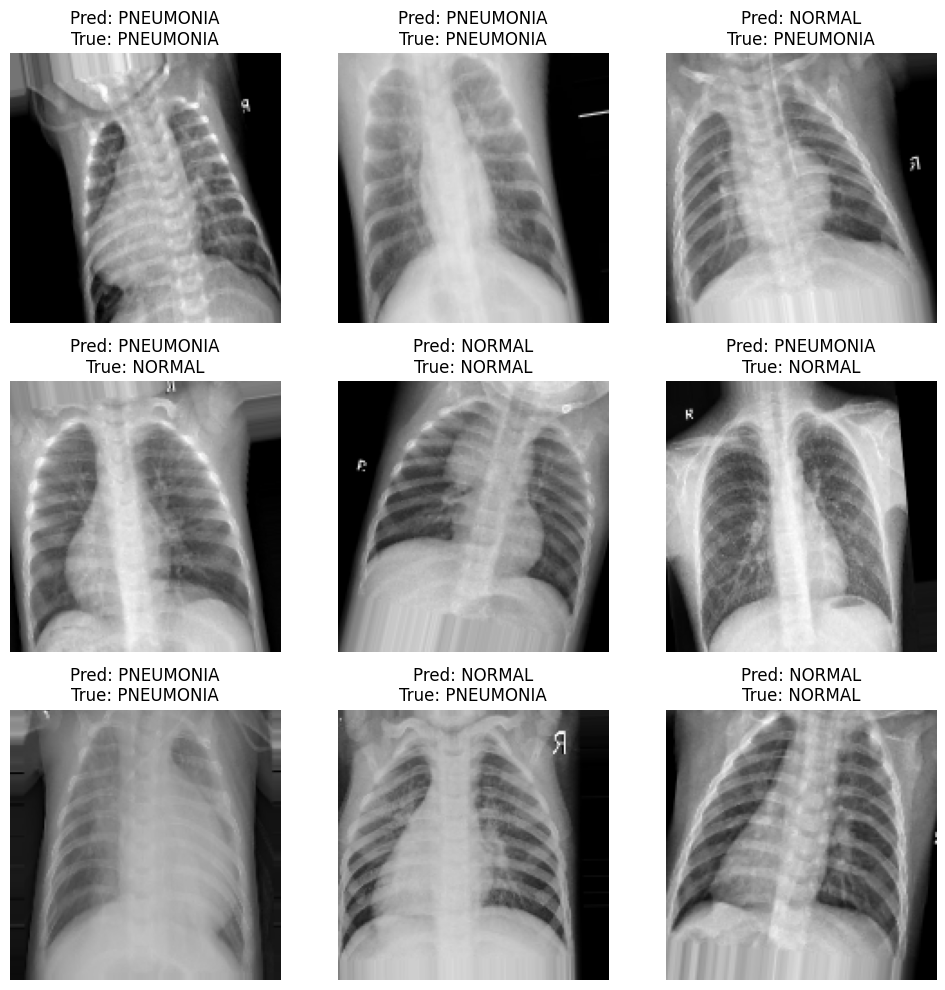

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Use the built-in next() function to get the next batch
x, y = next(test_data)
preds = model.predict(x)
pred_labels = (preds > 0.5).astype("int32")

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    # Ensure that the image data is in the correct format for matplotlib
    # ImageDataGenerator with rescale=1./255 typically outputs float data
    # Matplotlib can display float data between 0 and 1.
    plt.imshow(x[i])
    plt.title(f"Pred: {'PNEUMONIA' if pred_labels[i][0] else 'NORMAL'}\nTrue: {'PNEUMONIA' if y[i] else 'NORMAL'}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
model.save('pneumonia_model_v1.h5')
